In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [ ]:
import sqlite3
con = sqlite3.connect('data/data.sqlite')
cur = con.cursor()
cur.execute("DROP TABLE IF EXISTS ohlc")

In [ ]:
cur = con.cursor()
cur.execute("SELECT timestamp, open FROM ohlc WHERE timestamp >= 1513226220 AND timestamp < 1513237020 ")
result = cur.fetchall()

In [16]:
diff = 1513237020 - 1513226220
m = diff / 60
h = min/60
nxt = 1513237020 + diff
print(diff)
print(m)
print(h)

10800
180.0
3.0


[6]


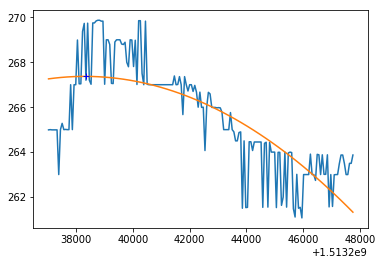

In [20]:
import sqlite3
import matplotlib.pyplot as plt
from trading.data import fit, extract, peaks
from trading.sql import window
con = sqlite3.connect('data/alldata.sqlite')
result = window(con, 1513237020, nxt)
xs, ys, x_new, y_new, f = fit(extract(result))
ps = peaks(y_new)
plt.plot(xs, ys, x_new, y_new, x_new[ps], y_new[ps],'b+')
plt.show()

In [ ]:
import sqlite3
import matplotlib.pyplot as plt
from trading.data import fit, extract
from trading.sql import window
con = sqlite3.connect('data/alldata.sqlite')
result = window(con, 1513226220, 1513237020)
xs, ys, x_new, y_new, f = fit(extract(result))
plt.plot(xs, ys, x_new, y_new)
plt.show()

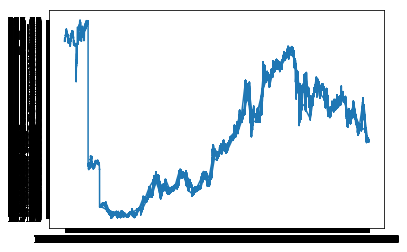

In [7]:
import sqlite3
import matplotlib.pyplot as plt

from trading.data import fit, extract
con = sqlite3.connect('data/alldata.sqlite')
cur = con.cursor()
cur.execute("SELECT timestamp, open FROM ohlc")

result = [x for x in cur.fetchall()]
#result = [[1513226220,"256.03","256.03","256.03","256.03","0.00","0.00000000",0],[1513226280,"256.03","256.03","256.03","256.03","0.00","0.00000000",0]]
xs, ys = extract(result)
plt.plot(xs, ys)
plt.show()